In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
load = pd.read_csv('C:\\Users\\Broken Arrow\\Pythonfiletest\\sales_data_sample.csv', usecols=['ORDERNUMBER',\
     'SALES','ORDERDATE','YEAR_ID','PRODUCTCODE',\
     'CITY','COUNTRY'])
load.head(5)
load.shape

(2823, 7)

In [3]:
tune1 = load["YEAR_ID"].isin([2003,2004]) 
tune2 = load["PRODUCTCODE"].isin(['S18_3232','S50_1392','S32_2509','S12_1666','S10_1949'])
tuned_load = load[tune1 & tune2]
print(tuned_load.shape)
tuned_load.head(5)

(135, 7)


,ORDERNUMBER,SALES,ORDERDATE,YEAR_ID,PRODUCTCODE,CITY,COUNTRY
26,10103,5404.62,1/29/2003 0:00,2003,S10_1949,Stavern,Norway
27,10112,7209.11,3/24/2003 0:00,2003,S10_1949,Lule,Sweden
28,10126,7329.06,5/28/2003 0:00,2003,S10_1949,Madrid,Spain
29,10140,7374.10,7/24/2003 0:00,2003,S10_1949,Burlingame,USA
30,10150,10993.50,9/19/2003 0:00,2003,S10_1949,Singapore,Singapore


In [4]:
print(np.unique(tuned_load.PRODUCTCODE).size)
#print(tune_load.count)
print(tuned_load['PRODUCTCODE'].value_counts())

5
S18_3232    43
S50_1392    23
S32_2509    23
S12_1666    23
S10_1949    23
Name: PRODUCTCODE, dtype: int64


In [5]:
tuned_load['ORDERDATE'] = tuned_load['ORDERDATE'].astype('datetime64[ns]')
new_dates = tuned_load.apply(lambda x: x['ORDERDATE'] + pd.DateOffset(years=16), axis=1)
tuned_load['ORDERDATE'] = new_dates
tuned_load['YEAR_ID'] = tuned_load['YEAR_ID'] + 16

C:\Users\Broken Arrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Broken Arrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Broken Arrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [6]:
print(tuned_load.shape)
tuned_load.head(5)

(135, 7)


,ORDERNUMBER,SALES,ORDERDATE,YEAR_ID,PRODUCTCODE,CITY,COUNTRY
26,10103,5404.62,2019-01-29,2019,S10_1949,Stavern,Norway
27,10112,7209.11,2019-03-24,2019,S10_1949,Lule,Sweden
28,10126,7329.06,2019-05-28,2019,S10_1949,Madrid,Spain
29,10140,7374.10,2019-07-24,2019,S10_1949,Burlingame,USA
30,10150,10993.50,2019-09-19,2019,S10_1949,Singapore,Singapore


In [7]:
tuned_load = tuned_load.append(tuned_load)

In [8]:
print(tuned_load.shape)
tuned_load.head(5)

(270, 7)


,ORDERNUMBER,SALES,ORDERDATE,YEAR_ID,PRODUCTCODE,CITY,COUNTRY
26,10103,5404.62,2019-01-29,2019,S10_1949,Stavern,Norway
27,10112,7209.11,2019-03-24,2019,S10_1949,Lule,Sweden
28,10126,7329.06,2019-05-28,2019,S10_1949,Madrid,Spain
29,10140,7374.10,2019-07-24,2019,S10_1949,Burlingame,USA
30,10150,10993.50,2019-09-19,2019,S10_1949,Singapore,Singapore


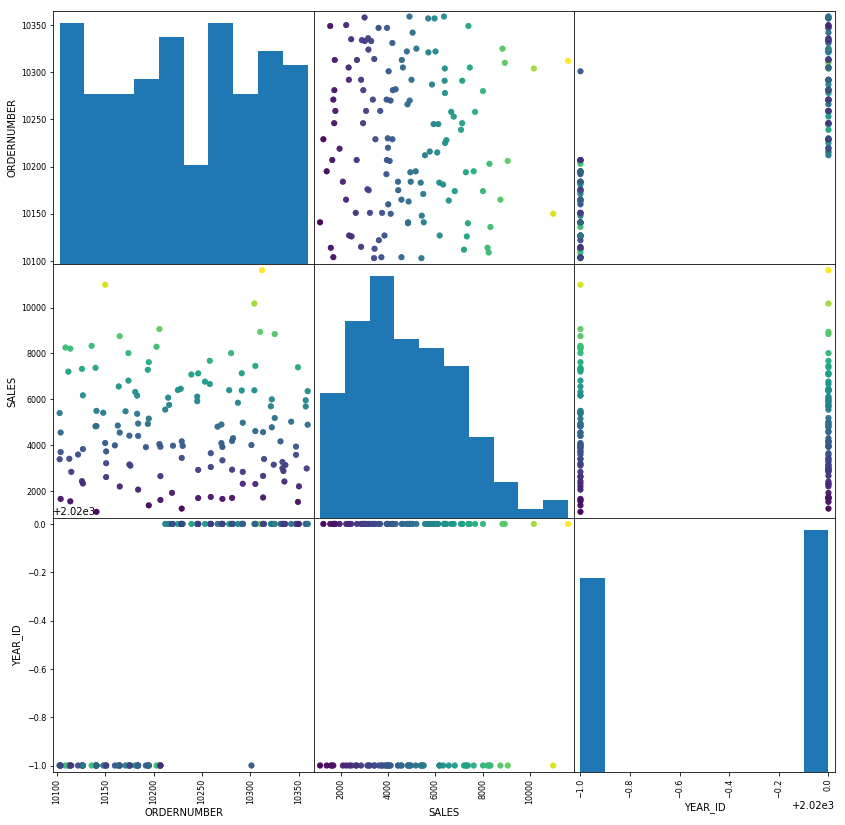

In [10]:
pd.plotting.scatter_matrix(tuned_load,alpha=.8, c=tuned_load['SALES'], marker='o',figsize=(14,14));